# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [12]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [13]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [14]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [15]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_landmarks(frame, results)

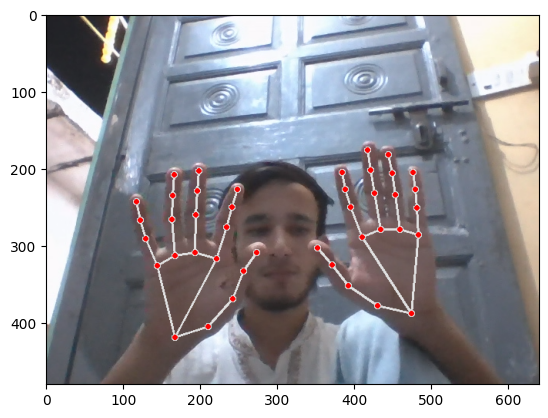

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 7.41327226e-01,  8.09299231e-01,  3.89019561e-07,  6.73181057e-01,
        7.89353848e-01, -2.49700882e-02,  6.13928556e-01,  7.35088944e-01,
       -3.75974253e-02,  5.79986215e-01,  6.77911699e-01, -4.85689156e-02,
        5.50644875e-01,  6.32293701e-01, -5.87519519e-02,  6.40645444e-01,
        6.03861868e-01, -1.41665582e-02,  6.18209302e-01,  5.22421598e-01,
       -3.20036225e-02,  6.07654154e-01,  4.73662049e-01, -4.89805043e-02,
        6.00957692e-01,  4.27605510e-01, -6.17363639e-02,  6.79631829e-01,
        5.82078040e-01, -1.79415103e-02,  6.65667534e-01,  4.83393610e-01,
       -3.11197899e-02,  6.58336997e-01,  4.21798348e-01, -4.47913595e-02,
        6.52419209e-01,  3.68716300e-01, -5.57181165e-02,  7.17324913e-01,
        5.81308126e-01, -2.63889078e-02,  7.08826005e-01,  4.87568915e-01,
       -4.10476699e-02,  7.01652527e-01,  4.30807829e-01, -5.09269573e-02,
        6.94040656e-01,  3.80794346e-01, -5.86505979e-02,  7.55613446e-01,
        5.96619844e-01, -

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 7.41327226e-01,  8.09299231e-01,  3.89019561e-07,  6.73181057e-01,
        7.89353848e-01, -2.49700882e-02,  6.13928556e-01,  7.35088944e-01,
       -3.75974253e-02,  5.79986215e-01,  6.77911699e-01, -4.85689156e-02,
        5.50644875e-01,  6.32293701e-01, -5.87519519e-02,  6.40645444e-01,
        6.03861868e-01, -1.41665582e-02,  6.18209302e-01,  5.22421598e-01,
       -3.20036225e-02,  6.07654154e-01,  4.73662049e-01, -4.89805043e-02,
        6.00957692e-01,  4.27605510e-01, -6.17363639e-02,  6.79631829e-01,
        5.82078040e-01, -1.79415103e-02,  6.65667534e-01,  4.83393610e-01,
       -3.11197899e-02,  6.58336997e-01,  4.21798348e-01, -4.47913595e-02,
        6.52419209e-01,  3.68716300e-01, -5.57181165e-02,  7.17324913e-01,
        5.81308126e-01, -2.63889078e-02,  7.08826005e-01,  4.87568915e-01,
       -4.10476699e-02,  7.01652527e-01,  4.30807829e-01, -5.09269573e-02,
        6.94040656e-01,  3.80794346e-01, -5.86505979e-02,  7.55613446e-01,
        5.96619844e-01, -

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
# DATA_PATH = os.path.join('C:/Users/Qasim/Documents/Major Project/ActionDetectionforSignLanguage-main/dataset') 
DATA_PATH = os.path.join(r'C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset') 


# Actions that we try to detect
actions = np.array(['Accident',  'Call',  'Doctor',  'Help', 'Hot', 'Lose', 'Pain', 'Thief'])

# # Thirty videos worth of data
no_sequences = 90

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

### making directory

In [17]:
import os
import numpy as np

for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    print("Checking action path:", action_path)
    
    if not os.path.exists(action_path):
        os.makedirs(action_path)
        print("Directory created:", action_path)
    else:
        print("Directory already exists:", action_path)
    
    #change this 
    for sequence in range(61, 91):
        new_dir = os.path.join(action_path, str(sequence))
        print("Creating directory:", new_dir)
        
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
            print("Sequence directory created:", new_dir)
        else:
            print("Sequence directory already exists:", new_dir)
            continue


Checking action path: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident
Directory already exists: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\61
Sequence directory already exists: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\61
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\62
Sequence directory already exists: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\62
Creating directory: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\63
Sequence directory already exists: C:\Users\Qasim\Documents\Major_Project\ActionDetectionforSignLanguage-main\Dataset\Accident\63
Creating directory: C:\Users\Qasi

# 5. Collect Keypoint Values for Training and Testing

### collecting images

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(61,91):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # Create the directory if it doesn't exist
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                
                # Save keypoints to npy_path
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            # print('Completed collecting frames for {} Video number{}'.format(action, sequence))
            cv2.putText(image, 'Completed collecting frames for {} Video number{}'.format(action, sequence), (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
            cv2.waitKey(3000)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
             
    cap.release()
    cv2.destroyAllWindows()

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [18]:
def check_missing_sequences(actions, no_sequences, sequence_length):
    missing_sequences = []
    for action in actions:
        for video_num in range(1, no_sequences):
            for sequence_num in range(sequence_length):
                npy_path = os.path.join(DATA_PATH, action, str(video_num), str(sequence_num) + '.npy')
                if not os.path.exists(npy_path):
                    missing_sequences.append((action, video_num, sequence_num))
    return missing_sequences

In [19]:
missing_sequences = check_missing_sequences(actions, no_sequences, sequence_length)
print("Missing sequences:", missing_sequences)

Missing sequences: []


In [20]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'Accident': 0,
 'Call': 1,
 'Doctor': 2,
 'Help': 3,
 'Hot': 4,
 'Lose': 5,
 'Pain': 6,
 'Thief': 7}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
np.array(sequences).shape

(720, 30, 126)

In [22]:
np.array(labels).shape

(720,)

In [23]:
X = np.array(sequences)

In [24]:
X.shape

(720, 30, 126)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [27]:
y_test.shape

(108, 8)

# 7. Build and Train LSTM Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
actions.shape[0]

8

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - categorical_accuracy: 0.2317 - loss: 1.9286
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.3199 - loss: 1.5375
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - categorical_accuracy: 0.5074 - loss: 1.3699
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.6268 - loss: 1.2137
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.6499 - loss: 1.1682
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.6619 - loss: 1.0321
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - categorical_accuracy: 0.7255 - loss: 0.9515
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - categorical_accuracy: 0.7744 - loss: 0.7655
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - categorical_accuracy: 0.7180 - loss: 0.8050
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - categorical_accuracy: 0.8213 - loss: 0.5545
Epoch 11/300
20/20 

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,264 (329.16 KB)

 Trainable params: 84,264 (329.16 KB)

 Non-trainable params: 0 (0.00 B)

# 8. Make Predictions

In [58]:
res = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [59]:
actions[np.argmax(res[4])]

'Call'

In [60]:
actions[np.argmax(y_test[4])]

'Call'

# 9. Save Weights

In [28]:
model.save('new_action.h5')

NameError: name 'model' is not defined

In [74]:
del model

# Load Model from weights

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
actions.shape[0]

8

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
model.load_weights('new_action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [42]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [43]:
from sklearn.metrics import classification_report

In [44]:
yhat = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/stepWARNING:tensorflow:5 out of the last 102 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000029B2B0A1CF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
ytrue

[0,
 6,
 1,
 1,
 6,
 5,
 2,
 6,
 2,
 5,
 6,
 5,
 6,
 4,
 6,
 5,
 2,
 2,
 6,
 2,
 1,
 0,
 2,
 7,
 3,
 2,
 1,
 0,
 6,
 1,
 6,
 1,
 7,
 4,
 6,
 4,
 2,
 1,
 2,
 7,
 1,
 6,
 0,
 4,
 1,
 0,
 7,
 1,
 5,
 6,
 7,
 6,
 3,
 7,
 0,
 1,
 0,
 1,
 6,
 6,
 5,
 0,
 4,
 2,
 2,
 6,
 4,
 3,
 4,
 5,
 3,
 5,
 6,
 3,
 1,
 3,
 6,
 5,
 4,
 4,
 7,
 3,
 7,
 5,
 7,
 5,
 5,
 6,
 1,
 0,
 5,
 7,
 6,
 2,
 3,
 1,
 1,
 6,
 7,
 3,
 3,
 0,
 6,
 5,
 7,
 6,
 6,
 4]

In [47]:
yhat

[0,
 6,
 1,
 1,
 6,
 5,
 2,
 6,
 2,
 5,
 6,
 5,
 6,
 4,
 6,
 5,
 2,
 2,
 6,
 2,
 1,
 0,
 2,
 7,
 3,
 2,
 1,
 0,
 6,
 1,
 6,
 1,
 7,
 4,
 6,
 4,
 2,
 1,
 2,
 7,
 1,
 6,
 0,
 4,
 1,
 0,
 7,
 1,
 5,
 6,
 7,
 6,
 3,
 7,
 0,
 1,
 0,
 1,
 6,
 6,
 5,
 0,
 4,
 2,
 2,
 6,
 4,
 3,
 4,
 5,
 3,
 5,
 6,
 3,
 1,
 3,
 6,
 5,
 4,
 4,
 7,
 3,
 7,
 5,
 1,
 5,
 5,
 6,
 1,
 0,
 5,
 7,
 6,
 2,
 3,
 1,
 1,
 6,
 7,
 3,
 3,
 0,
 6,
 5,
 7,
 6,
 6,
 4]

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[98,  0],
        [ 0, 10]],

       [[91,  1],
        [ 0, 16]],

       [[96,  0],
        [ 0, 12]],

       [[98,  0],
        [ 0, 10]],

       [[98,  0],
        [ 0, 10]],

       [[94,  0],
        [ 0, 14]],

       [[84,  0],
        [ 0, 24]],

       [[96,  0],
        [ 1, 11]]], dtype=int64)

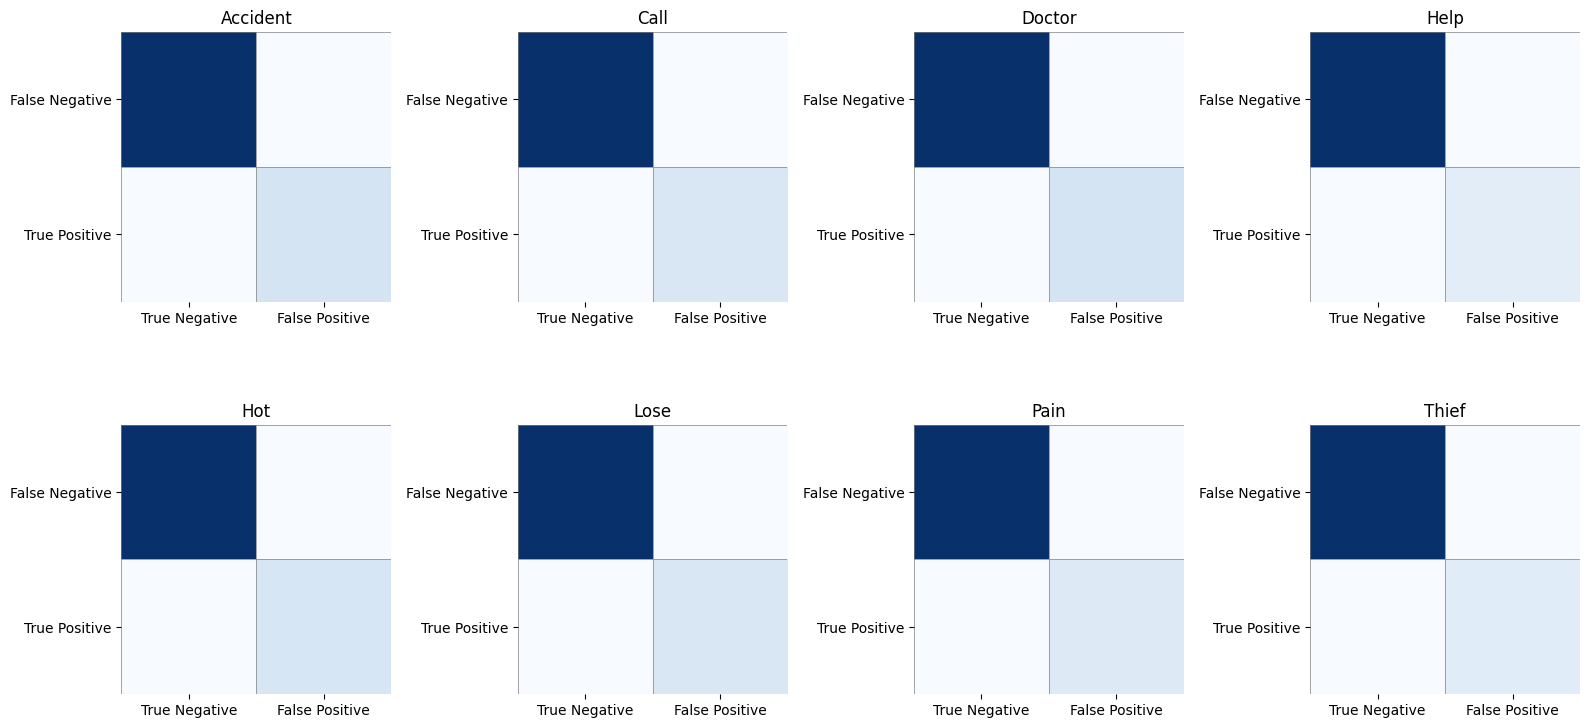

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# Example confusion matrices
conf_matrices = np.array([[[92, 0], [0, 16]],
                          [[94, 0], [0, 14]],
                          [[92, 0], [0, 16]],
                          [[98, 0], [0, 10]],
                          [[93, 0], [0, 15]],
                          [[94, 0], [0, 14]],
                          [[96, 0], [0, 12]],
                          [[97, 0], [0, 11]]])

# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
labels = ['Accident', 'Call', 'Doctor', 'Help', 'Hot', 'Lose', 'Pain', 'Thief']

for i, ax in enumerate(axes.flat):
    tn, fp, fn, tp = conf_matrices[i].ravel()
    ax.imshow([[tn, fp], [fn, tp]], cmap=plt.cm.Blues, interpolation='nearest')
    ax.set(xticks=np.arange(2), yticks=np.arange(2), xticklabels=['True Negative', 'False Positive'], yticklabels=['False Negative', 'True Positive'], title=labels[i])
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(2)-0.5, minor=True)
    ax.set_yticks(np.arange(2)-0.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()


In [50]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        24
           7       1.00      0.92      0.96        12

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [51]:
accuracy_score(ytrue, yhat)

0.9907407407407407

# 11. Test in Real Time

In [2]:
!pip install gtts


In [4]:
!pip install flask


   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.7 kB ? eta -:--:--
   ----------- --------------------------- 30.7/101.7 kB 220.2 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 196.9 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/101.7 kB 273.8 kB/s eta 0:00:01
   ------------------------------- ------- 81.9/101.7 kB 306.3 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/101.7 kB 327.7 kB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 325.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ----------- --------------------------- 41.0/133.3 kB 653.6 kB/s eta 0:00:01
   ---------

In [3]:
    import cv2
    import mediapipe as mp
    import numpy as np
    from tensorflow.keras.models import load_model
    from gtts import gTTS
    import os

    # Load your pre-trained LSTM model
    model = load_model('new_action.h5')
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    # Set up MediaPipe holistic model for hand landmarks
    mp_holistic = mp.solutions.holistic
    holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    mp_drawing = mp.solutions.drawing_utils # Drawing utilities

    # Function to preprocess hand landmarks
    def extract_keypoints(results):
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        return np.concatenate([lh, rh])

    # Function to generate audio file
    def generate_audio(action):
        tts = gTTS(text=action, lang='en')
        filename = f"{action}.mp3"
        tts.save(filename)
        print(f"Audio file saved: {filename}")

    # Initialize variables for prediction logic
    sequence = []
    predictions = []

    # Threshold for prediction confidence
    threshold = 0.5

    # Initialize variables for visualization
    actions = ['Accident',  'Call',  'Doctor',  'Help', 'Hot', 'Lose', 'Pain', 'Thief']
    sentence = []

    # Function to draw hand landmarks with styling
    def draw_styled_landmarks(image, results):
        # Draw connections between landmarks
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
                                                                                thickness=2, circle_radius=4),
                                connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
                                                                                thickness=2, circle_radius=4),
                                connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

        # Draw landmarks with different colors for left and right hands
        for hand_landmarks in [results.left_hand_landmarks, results.right_hand_landmarks]:
            if hand_landmarks:
                for idx, landmark in enumerate(hand_landmarks.landmark):
                    # Define different colors for left and right hands
                    if idx % 3 == 0:
                        color = (255, 0, 0)  # Red for x-coordinate
                    elif idx % 3 == 1:
                        color = (0, 255, 0)  # Green for y-coordinate
                    else:
                        color = (0, 0, 255)  # Blue for z-coordinate
                    # Draw landmark
                    cx, cy = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                    cv2.circle(image, (cx, cy), 5, color, -1)
        return image

    # Function to visualize action probabilities
    def prob_viz(probabilities, actions, image):
        # Initialize variables for visualization
        bar_height = 60
        spacing = 3
        bar_margin = (20, 50)
        line_color = (0, 250, 0)
        text_color = (0, 0, 0)
        
        # Sort actions based on probabilities
        sorted_indices = np.argsort(probabilities)[::-1]
        sorted_actions = [actions[i] for i in sorted_indices]
        sorted_probabilities = [probabilities[i] for i in sorted_indices]
        
        # Determine the maximum probability
        max_prob = max(sorted_probabilities)

        # Maximum length of the line based on the width of the image frame
        max_line_length = image.shape[1] - 2 * bar_margin[1]
        
        # Draw lines for each action
        for i, (prob, action) in enumerate(zip(sorted_probabilities, sorted_actions)):
            # Calculate the length of the line based on the probability
            line_length = int(prob / max_prob * max_line_length)
            line_length = min(line_length, max_line_length)  # Limit the line length

            # Calculate the position of the line
            start_point = (bar_margin[0], i * (bar_height + spacing) + bar_margin[1] + bar_height // 2)
            end_point = (start_point[0] + line_length, start_point[1])
            
            # Draw the line
            cv2.line(image, start_point, end_point, line_color, 8)
            
            # Draw the action label
            cv2.putText(image, action, (end_point[0] + spacing, end_point[1] + 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)
            
            # Draw the probability value
            cv2.putText(image, f"{prob:.2f}", (end_point[0] + spacing, end_point[1] - 15), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)
        
        return image


    # Start capturing video from webcam
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Make detections with MediaPipe holistic model
        results = holistic.process(frame_rgb)
        
        # Draw landmarks with styling
        image_with_landmarks = draw_styled_landmarks(frame.copy(), results)

        # Define image_with_probs here to ensure it's accessible in the entire loop
        image_with_probs = image_with_landmarks.copy()
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            # Perform inference
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            # Visualization logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            generate_audio(actions[np.argmax(res)])      ####
                    else:
                        sentence.append(actions[np.argmax(res)])
                        generate_audio(actions[np.argmax(res)])         #####

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Display predicted action probabilities
            image_with_probs = prob_viz(res, actions, image_with_landmarks.copy())
            
        # Display the sentence
        cv2.rectangle(image_with_probs, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image_with_probs, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # Draw a line to indicate the prediction
        prediction_text = ' '.join(sentence)
        cv2.line(image_with_probs, (10, 40), (10 + len(prediction_text) * 12, 40), (255, 255, 255), 2)
        
        # Show the frame with hand landmarks and predictions
        cv2.imshow('Indian Emergency Hand Sign Detection', image_with_probs)
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()


c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
Audio file saved: Call.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Audio file saved: Hot.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

c:\Users\Qasim\anaconda3\envs\islsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [4]:
cap.release()
cv2.destroyAllWindows()